In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class DVBS2X:
    def __init__(self, num_symbols, samples_per_symbol, carrier_freq):
        self.num_symbols = num_symbols
        self.samples_per_symbol = samples_per_symbol
        self.carrier_freq = carrier_freq

    def generate_bpsk(self):
        bits = np.random.randint(0, 2, self.num_symbols)
        symbols = 2 * bits - 1  # Map 0 to -1 and 1 to 1
        return self.modulate(symbols), symbols, bits

    def generate_qpsk(self):
        bits = np.random.randint(0, 2, 2 * self.num_symbols)
        qpsk_map = {
            (0, 0): 1 + 1j, (0, 1): -1 + 1j,
            (1, 1): -1 - 1j, (1, 0): 1 - 1j
        }
        symbols = np.array([qpsk_map[tuple(bits[i:i+2])] for i in range(0, len(bits), 2)])
        return self.modulate(symbols), symbols, bits

    def generate_8apsk(self):
        return self._generate_apsk(8, 3, [1, 2.6], [1, 7])

    def generate_16apsk(self):
        return self._generate_apsk(16, 4, [1, 2.6], [4, 12])

    def generate_32apsk(self):
        return self._generate_apsk(32, 5, [1, 2.6, 4.15], [4, 12, 16])

    def generate_64apsk(self):
        return self._generate_apsk(64, 6, [1, 1.6, 2.4, 3.5], [4, 12, 20, 28])

    def generate_128apsk(self):
        return self._generate_apsk(128, 7, [1, 1.5, 2.2, 3.0, 3.8], [4, 12, 20, 40, 52])

    def generate_256apsk(self):
        return self._generate_apsk(256, 8, [1, 1.4, 1.9, 2.5, 3.2, 4.0], [4, 12, 20, 28, 60, 132])

    def _generate_apsk(self, m, bits_per_symbol, radii, points_per_ring):
        bits = np.random.randint(0, 2, bits_per_symbol * self.num_symbols)
        
        constellation = []
        for r, n in zip(radii, points_per_ring):
            for k in range(n):
                angle = 2 * np.pi * k / n
                constellation.append(r * np.exp(1j * angle))
        constellation = np.array(constellation)
        
        constellation /= np.sqrt(np.mean(np.abs(constellation)**2))
        
        symbols = np.zeros(self.num_symbols, dtype=complex)
        for i in range(self.num_symbols):
            bit_chunk = bits[i*bits_per_symbol:(i+1)*bits_per_symbol]
            symbol_index = int(''.join(map(str, bit_chunk)), 2)
            symbols[i] = constellation[symbol_index]
        
        return self.modulate(symbols), symbols, bits

    def modulate(self, symbols):
        t = np.arange(self.num_symbols * self.samples_per_symbol) / (self.carrier_freq * self.samples_per_symbol)
        upsampled = np.repeat(symbols, self.samples_per_symbol)
        carrier = np.exp(2j * np.pi * self.carrier_freq * t)
        signal = np.real(upsampled * carrier)
        return t, signal

    def plot_signal(self, t, signal, modulation_type, num_symbols_to_plot=10):
        samples_to_plot = num_symbols_to_plot * self.samples_per_symbol
        plt.figure(figsize=(12, 6))
        plt.plot(t[:samples_to_plot], signal[:samples_to_plot])
        plt.title(f'{modulation_type} Modulated Signal (Zoomed-in on {num_symbols_to_plot} symbols)')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()
    
    def plot_constellation(self, symbols, modulation_type):
        plt.figure(figsize=(8, 8))
        plt.scatter(symbols.real, symbols.imag, c='r', alpha=0.5)
        plt.title(f'{modulation_type} Constellation Diagram')
        plt.xlabel('In-phase')
        plt.ylabel('Quadrature')
        plt.grid(True)
        plt.axis('equal')
        plt.show()

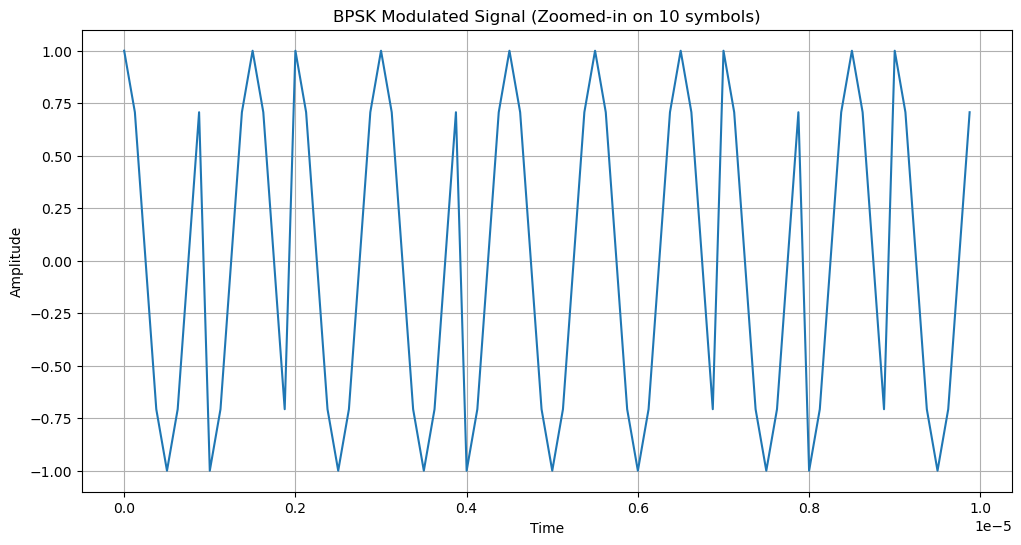

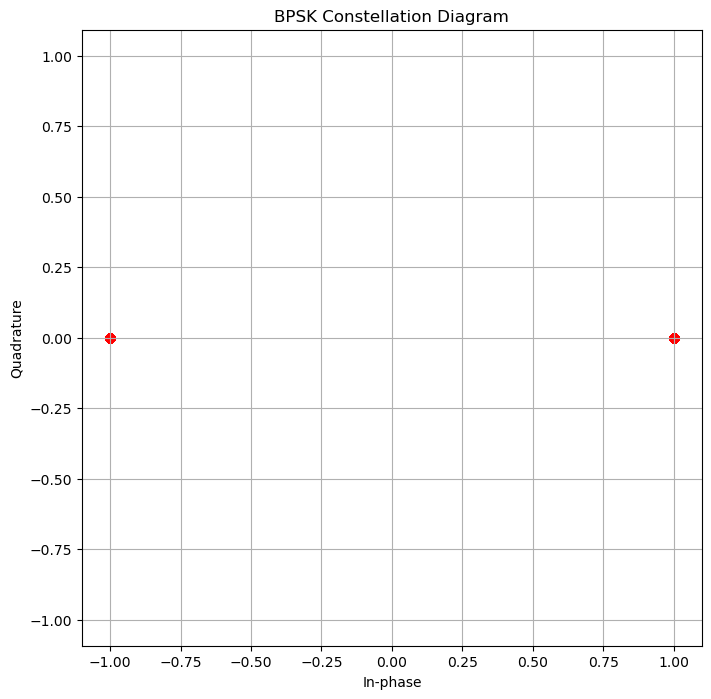


BPSK - First 10 symbols: [ 1 -1  1  1 -1 -1 -1  1 -1  1]


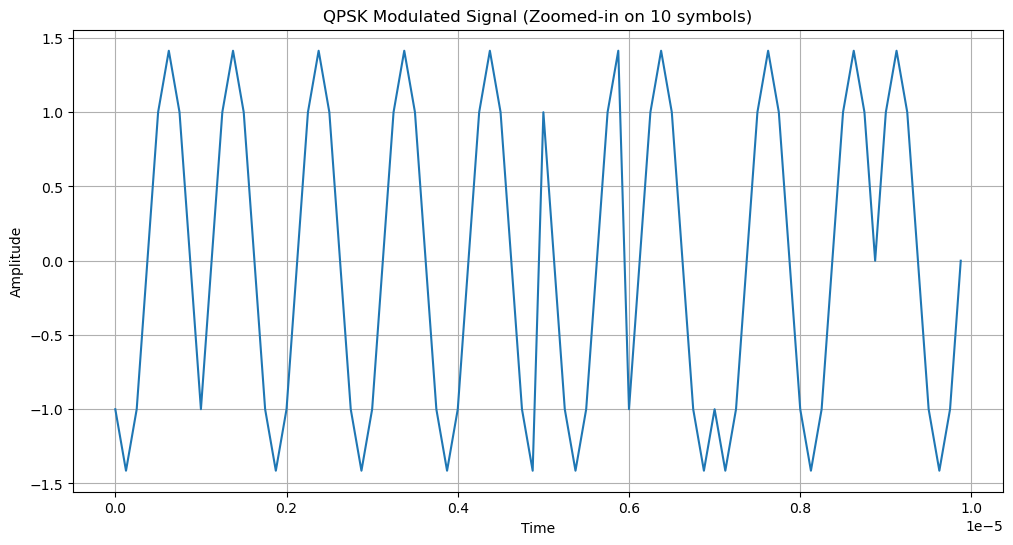

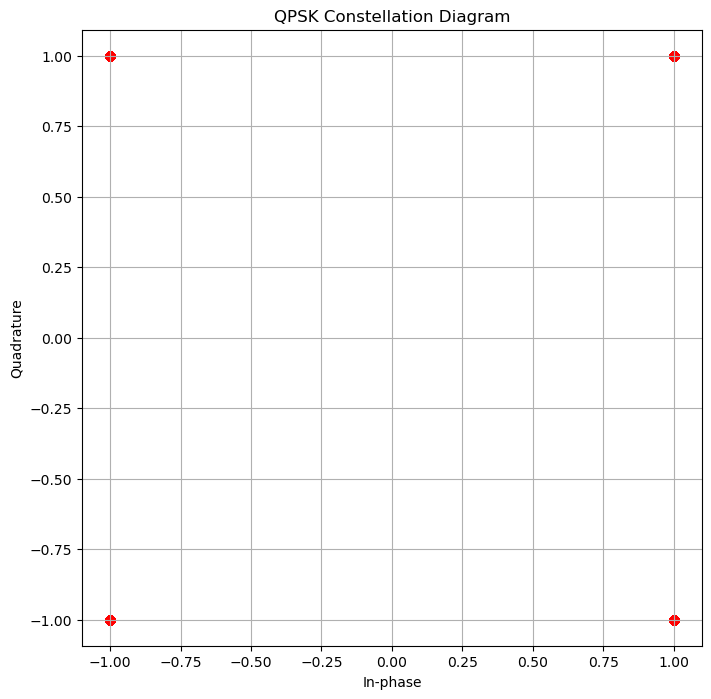


QPSK - First 10 symbols: [-1.+1.j -1.-1.j -1.-1.j -1.-1.j -1.-1.j  1.+1.j -1.-1.j -1.+1.j -1.+1.j
  1.-1.j]


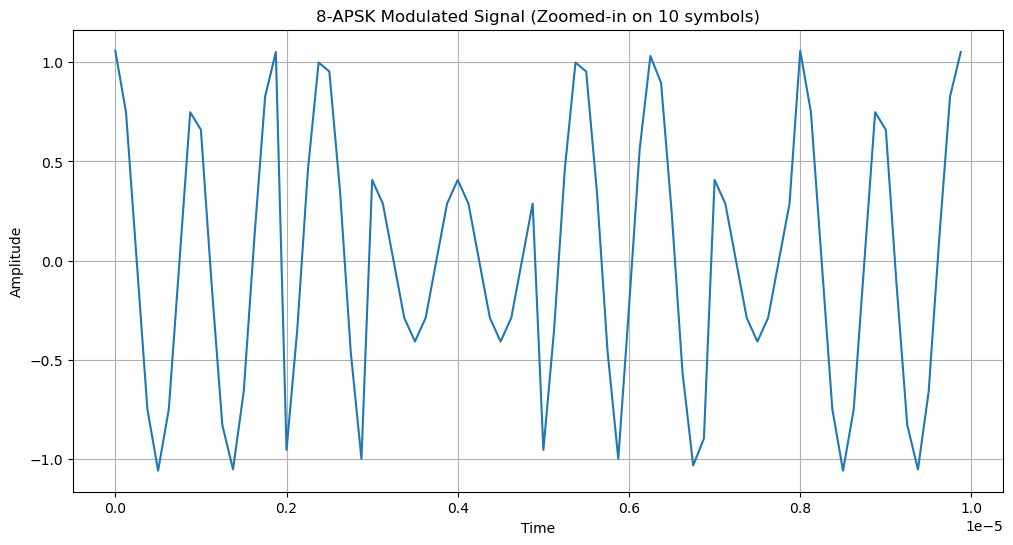

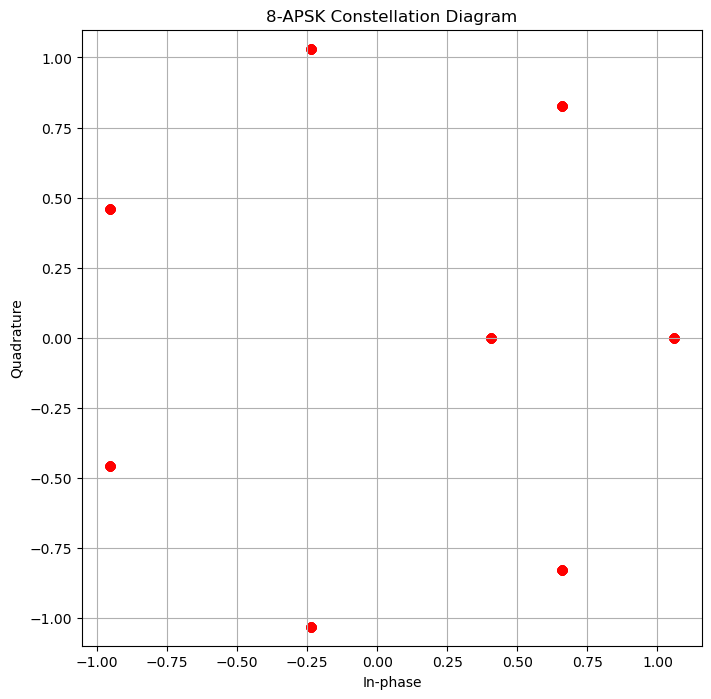


8-APSK - First 10 symbols: [ 1.057925  +0.j          0.65960545+0.82711907j -0.95315749-0.45901645j
  0.40689423+0.j          0.40689423+0.j         -0.95315749-0.45901645j
 -0.23541046-1.03140061j  0.40689423+0.j          1.057925  +0.j
  0.65960545+0.82711907j]


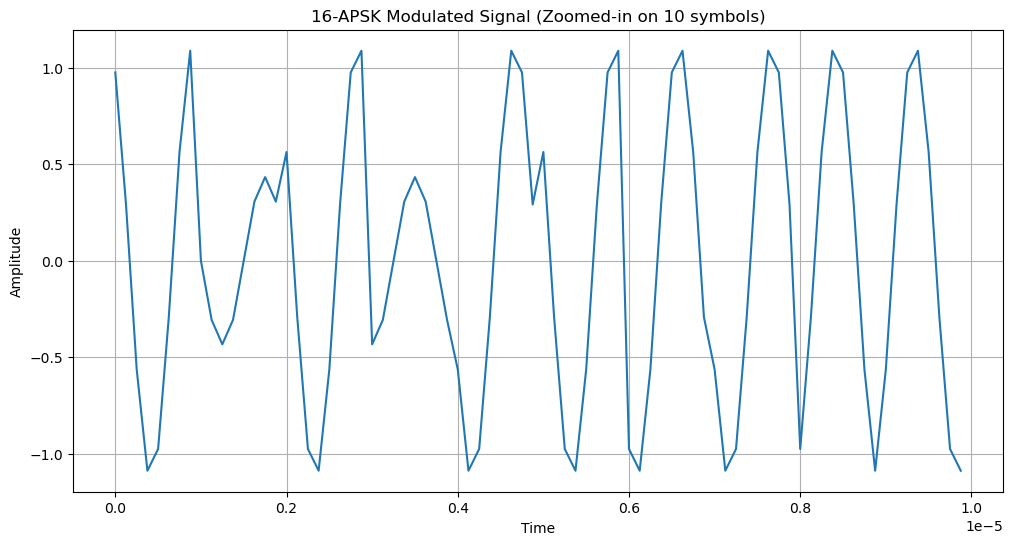

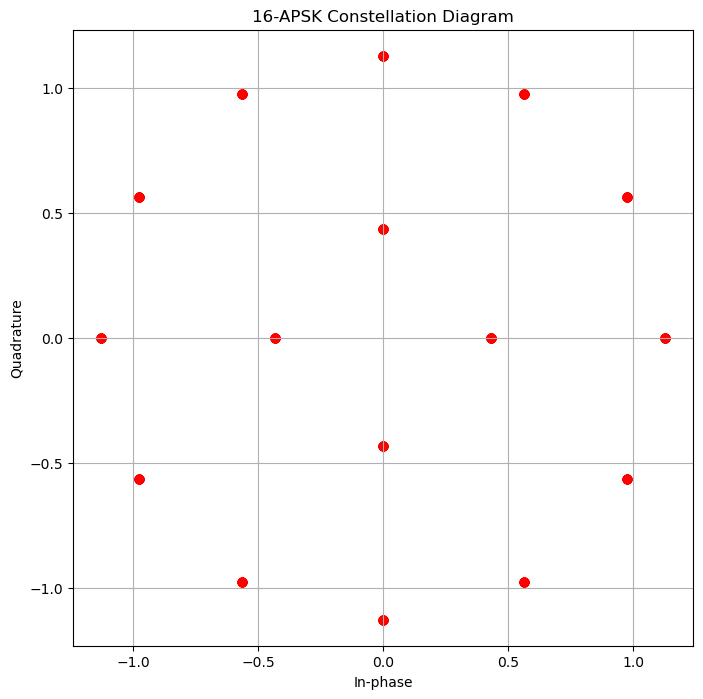


16-APSK - First 10 symbols: [ 9.76221040e-01+5.63621480e-01j  2.65475862e-17+4.33554985e-01j
  5.63621480e-01+9.76221040e-01j -4.33554985e-01+5.30951724e-17j
 -5.63621480e-01+9.76221040e-01j  5.63621480e-01+9.76221040e-01j
 -9.76221040e-01+5.63621480e-01j -5.63621480e-01+9.76221040e-01j
 -9.76221040e-01-5.63621480e-01j -5.63621480e-01-9.76221040e-01j]


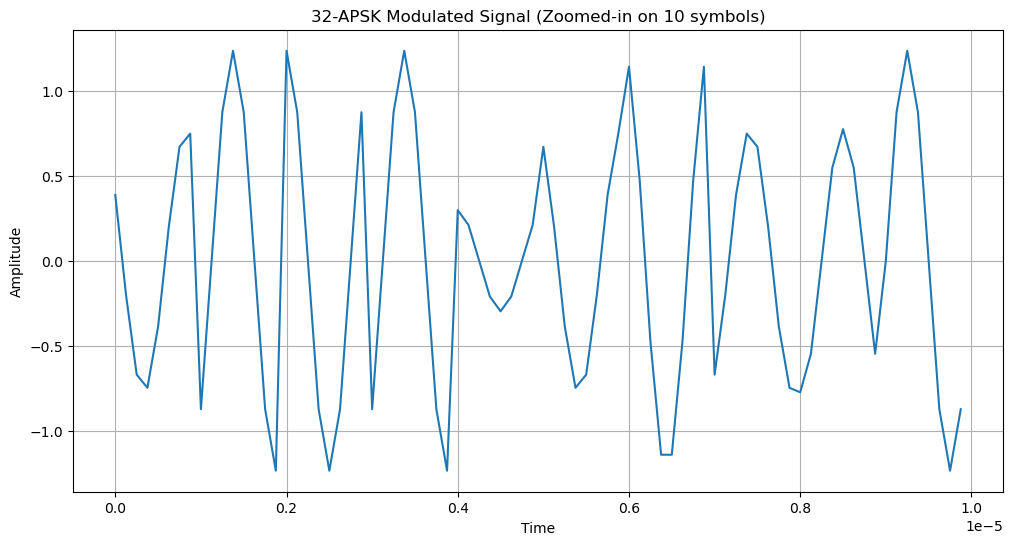

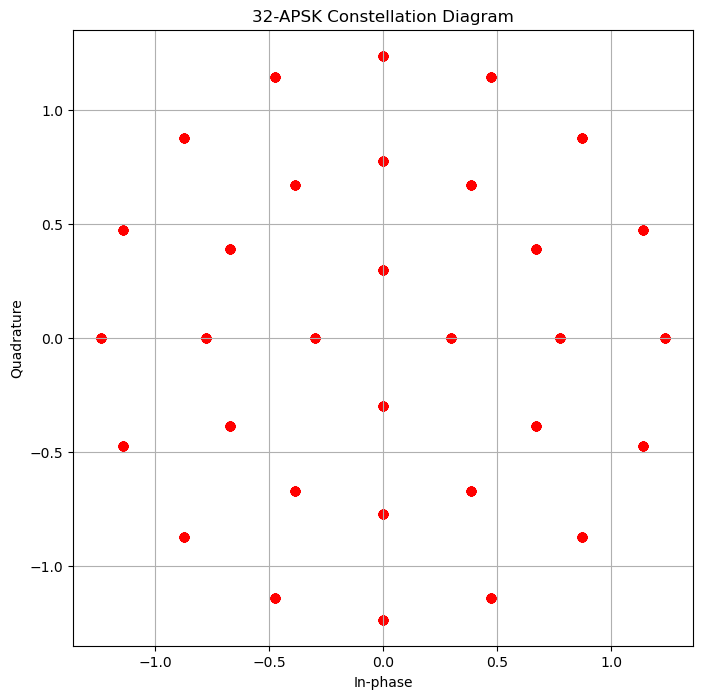


32-APSK - First 10 symbols: [ 3.87219581e-01+6.70683988e-01j -8.74071697e-01-8.74071697e-01j
  1.23612405e+00+0.00000000e+00j -8.74071697e-01-8.74071697e-01j
  2.97861216e-01+0.00000000e+00j  6.70683988e-01+3.87219581e-01j
  1.14202971e+00+4.73044193e-01j -6.70683988e-01-3.87219581e-01j
 -7.74439162e-01+9.48414441e-17j -2.27072304e-16-1.23612405e+00j]


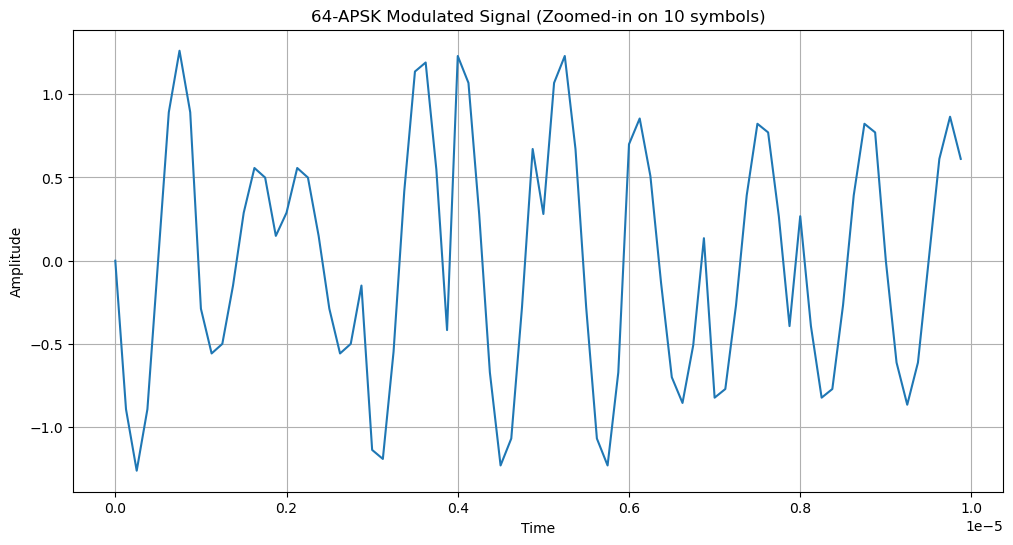

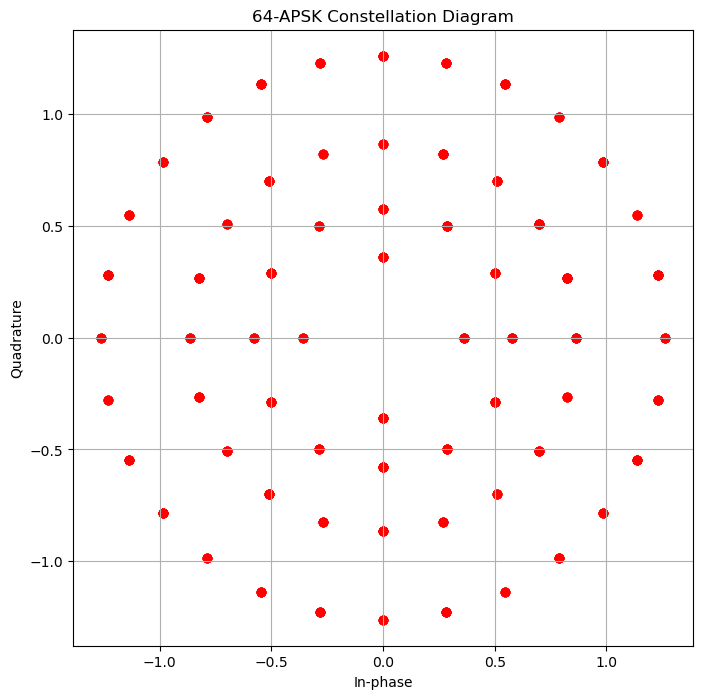


64-APSK - First 10 symbols: [ 7.72237109e-17+1.26115891j -2.88264893e-01+0.49928944j
  2.88264893e-01-0.49928944j -1.13626491e+00+0.54719634j
  1.22953902e+00-0.28063426j  2.80634258e-01-1.22953902j
  6.99633592e-01-0.50831356j -8.22468615e-01+0.26723625j
  2.67236252e-01+0.82246861j  5.29534018e-17+0.86479468j]


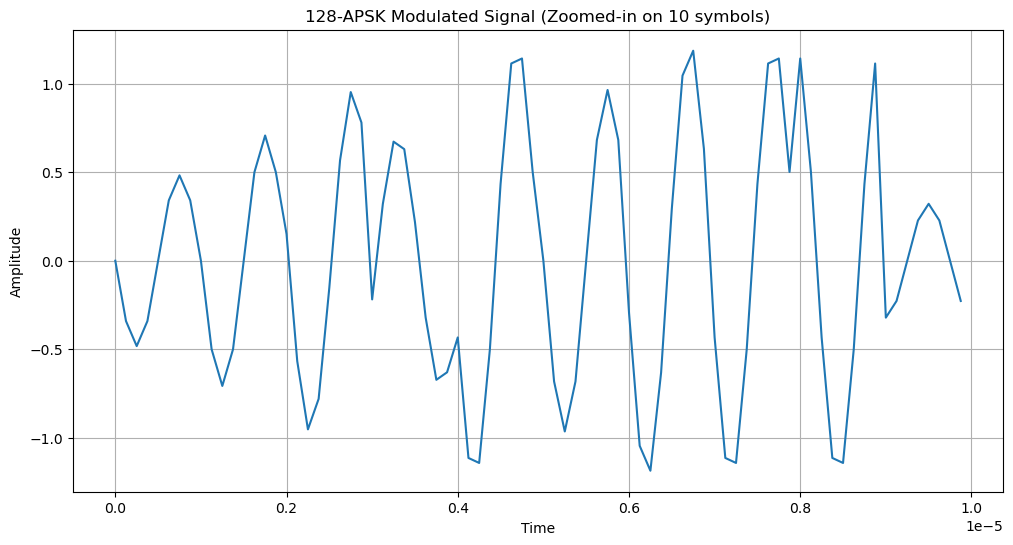

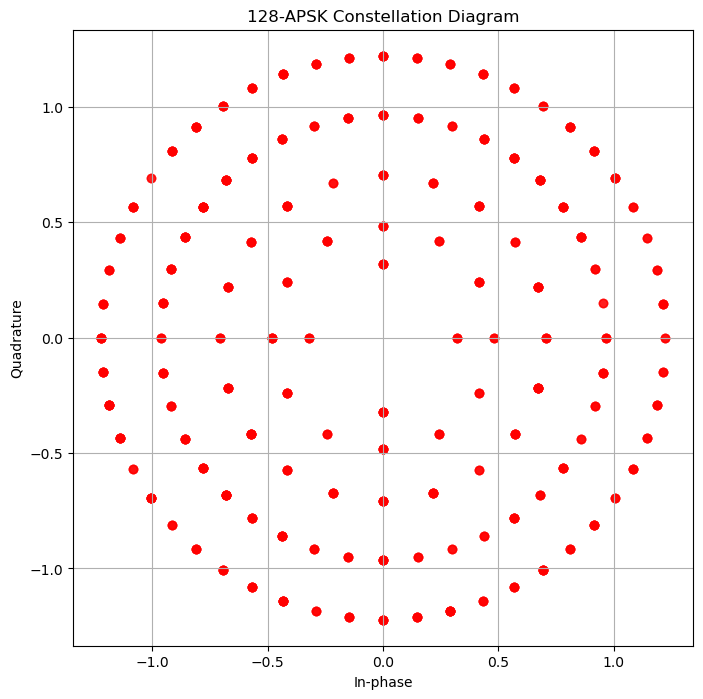


128-APSK - First 10 symbols: [ 2.95255188e-17+4.82188314e-01j  4.33040942e-17+7.07209528e-01j
  1.50861742e-01+9.52503552e-01j -2.18539763e-01-6.72596230e-01j
 -4.33165376e-01+1.14216323e+00j  5.90510376e-17+9.64376629e-01j
 -2.92334549e-01+1.18604789e+00j -4.33165376e-01+1.14216323e+00j
  1.14216323e+00+4.33165376e-01j -3.21458876e-01+3.93673584e-17j]


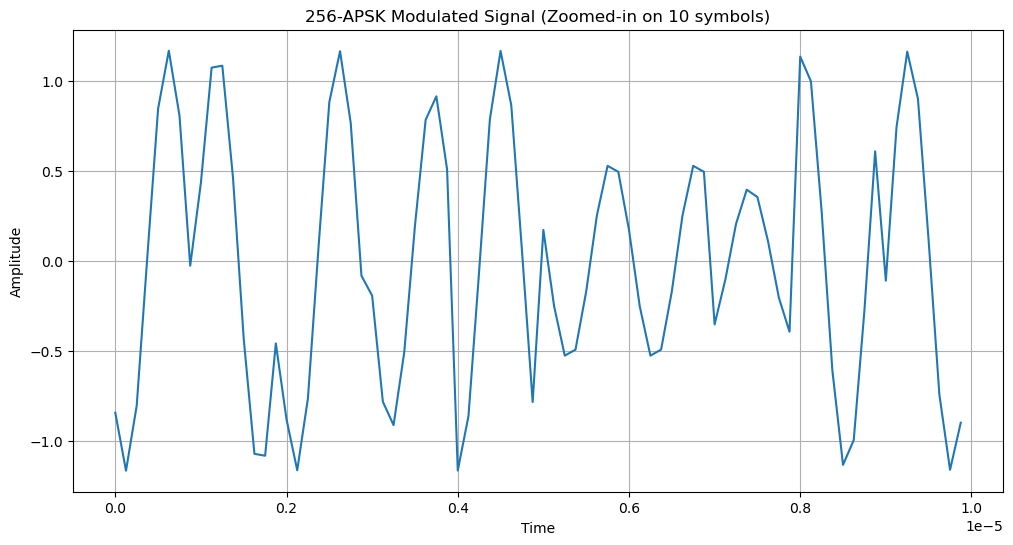

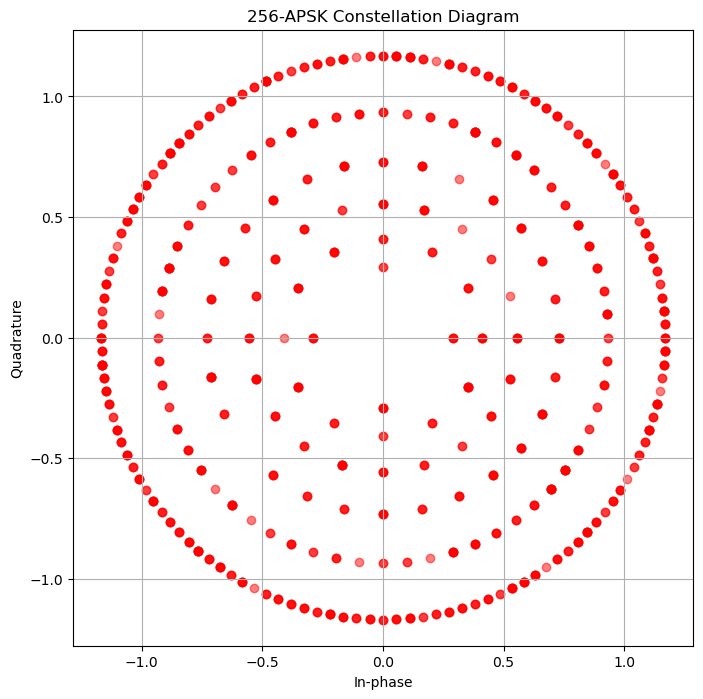


256-APSK - First 10 symbols: [-0.84550716+0.80618945j  0.43419717-1.08457209j -0.88290953+0.76504546j
 -0.19431539+0.91418202j -1.1669335 +0.05558789j  0.17148031+0.52776214j
  0.17148031+0.52776214j -0.354109  -0.20444493j  1.13532541-0.27542696j
 -0.11104986-1.16296678j]


In [3]:
dvbs2x = DVBS2X(num_symbols=1000, samples_per_symbol=8, carrier_freq=1e6)

modulation_schemes = [
    ('BPSK', dvbs2x.generate_bpsk),
    ('QPSK', dvbs2x.generate_qpsk),
    ('8-APSK', dvbs2x.generate_8apsk),
    ('16-APSK', dvbs2x.generate_16apsk),
    ('32-APSK', dvbs2x.generate_32apsk),
    ('64-APSK', dvbs2x.generate_64apsk),
    ('128-APSK', dvbs2x.generate_128apsk),
    ('256-APSK', dvbs2x.generate_256apsk)
]

for name, func in modulation_schemes:
    (t, signal), symbols, bits = func()
    dvbs2x.plot_signal(t, signal, name)
    dvbs2x.plot_constellation(symbols, name)
    print(f"\n{name} - First 10 symbols:", symbols[:10])

In [7]:
import numpy as np
import pandas as pd

# Create a DVBS2X object
dvbs2x = DVBS2X(num_symbols=100, samples_per_symbol=10, carrier_freq=1000)

# Define the modulation types
modulation_types = ['bpsk', 'qpsk', '8apsk', '16apsk', '32apsk', '64apsk', '128apsk', '256apsk']

# Create a list to store the features for each symbol
features_list = []

# Generate symbols for each modulation type
for modulation_type in modulation_types:
    if modulation_type == 'bpsk':
        _, symbols, bits = dvbs2x.generate_bpsk()
    elif modulation_type == 'qpsk':
        _, symbols, bits = dvbs2x.generate_qpsk()
    elif modulation_type == '8apsk':
        _, symbols, bits = dvbs2x.generate_8apsk()
    elif modulation_type == '16apsk':
        _, symbols, bits = dvbs2x.generate_16apsk()
    elif modulation_type == '32apsk':
        _, symbols, bits = dvbs2x.generate_32apsk()
    elif modulation_type == '64apsk':
        _, symbols, bits = dvbs2x.generate_64apsk()
    elif modulation_type == '128apsk':
        _, symbols, bits = dvbs2x.generate_128apsk()
    elif modulation_type == '256apsk':
        _, symbols, bits = dvbs2x.generate_256apsk()

    # Extract features for each symbol
    for i, symbol in enumerate(symbols):
        magnitude = np.abs(symbol)
        phase = np.angle(symbol)
        real = np.real(symbol)
        imag = np.imag(symbol)
        label = ''.join(map(str, bits[i:i+dvbs2x.num_symbols//len(symbols)]))

        # Create a dictionary to store the features for this symbol
        features = {
            'modulation_type': modulation_type,
            'symbol': symbol,
            'label': label,
            'magnitude': magnitude,
            'phase': phase,
            'real': real,
            'imag': imag
        }

        # Append the features to the list
        features_list.append(features)

# Create a pandas DataFrame from the list of features
df = pd.DataFrame(features_list)

# Print the first few rows of the DataFrame
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv('symbol_features.csv', index=False)

    modulation_type              symbol label  magnitude     phase      real  \
795         256apsk -0.288809+0.888863j     0   0.934605  1.884956 -0.288809   
796         256apsk -0.288809-0.888863j     0   0.934605 -1.884956 -0.288809   
797         256apsk  0.677655-0.951634j     1   1.168257 -0.951998  0.677655   
798         256apsk  1.084572-0.434197j     0   1.168257 -0.380799  1.084572   
799         256apsk -0.527762+0.171480j     0   0.554922  2.827433 -0.527762   

         imag  
795  0.888863  
796 -0.888863  
797 -0.951634  
798 -0.434197  
799  0.171480  
